# Analysis of Ridge Regression with original data
Use the original data(no modification is made) to fit Ridge Regression

In [1]:
from pathlib import Path
import os
wd=Path().absolute().parent
os.chdir(wd) #change the working dirctory to parant

In [2]:
from modules.func import *
import matplotlib.pyplot as plt
import numpy as np
# from modules.encoder import l
import pickle
from pathlib import Path
from tqdm import tqdm

all_data_dir=Path('./data/alldata/')
datalist=[x for x in all_data_dir.iterdir()]
output_dir=Path("output/data/ridge_regression/")

## Significance

knockout
wild-type


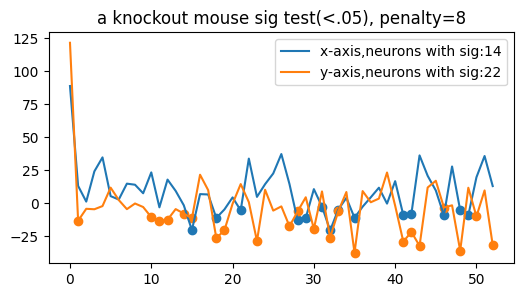

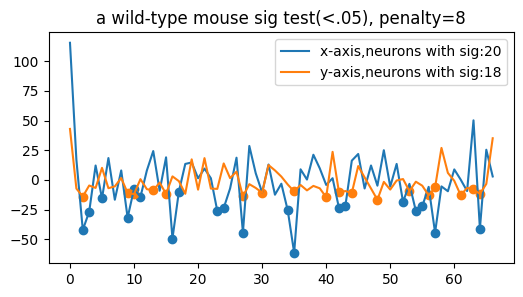

In [86]:
id_list=[0,2]
for id_ in id_list:
    plt.figure(figsize=(6,3))
    data_name=str(datalist[id_]).split('/')[-1]
    sample_type = "knockout" if "CaMKII" in data_name else "wild-type"

    with open(Path(output_dir/f"rr_raw_data_{data_name}.pickle"),"rb") as f:
        results_all=pickle.load(f) # load theta(fitted weight), prediction, penealty, and observed position test data
    print(sample_type)
    # df=pd.DataFrame([result["model_smry"] for result in results_all if result["penalty"]==8] )
    df=pd.DataFrame(results_all)

    coord_axis_opts=["x-axis","y-axis"]
    for coord_axis in coord_axis_opts:
        result_smry=df[(df["coord_axis"]==coord_axis)]["model_smry"].values[0]
        sig=result_smry["individual sig"]
        yy=[np.nan if s>.05 else result_smry["fitted parameter"][id_] for id_,s in enumerate(sig) ]
        plt.scatter(range(len(sig)),yy)
        plt.plot(range(len(sig)),result_smry["fitted parameter"],label=coord_axis+f",neurons with sig:{sum(~np.isnan(yy))}")


    plt.title(f"a {sample_type} mouse sig test(<.05), penalty=8")
    plt.legend()

# Results Visualization

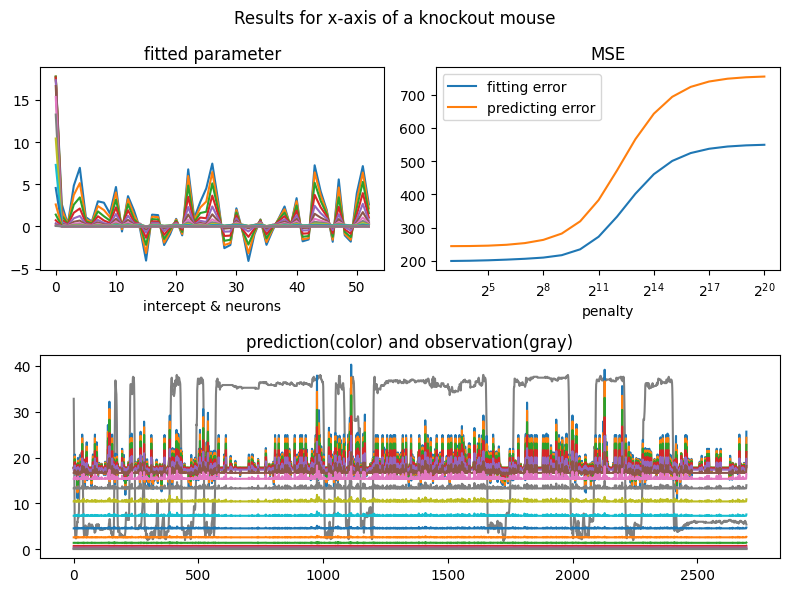

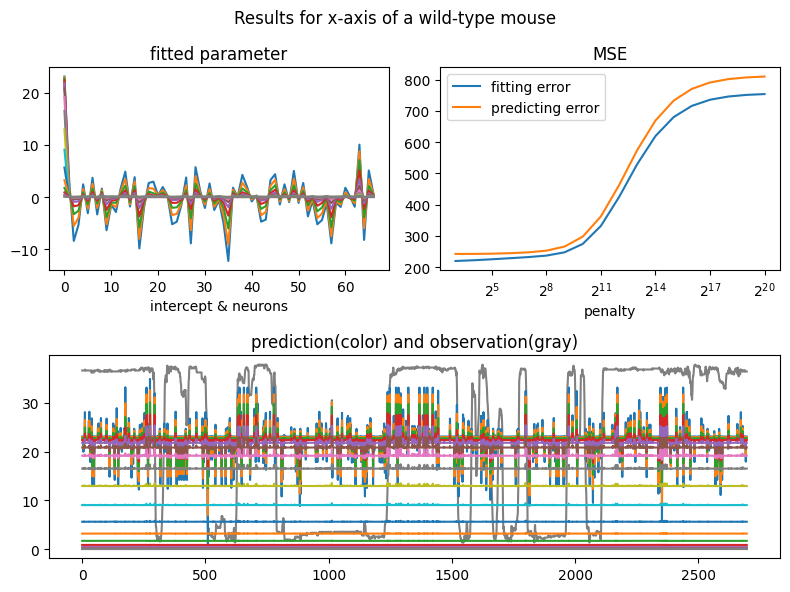

In [22]:
# coordinate
coord_axis="x-axis"
for mouse_id in [0,2]:
    data_name=str(datalist[mouse_id]).split('/')[-1]
    sample_type = "knockout" if "CaMKII" in data_name else "wild-type"

    with open(Path(output_dir/f"rr_summary_coor{coord_axis}_{data_name}.pickle"),"rb") as f:
        results_list,y_test=pickle.load(f) # load theta(fitted weight), prediction, penealty, and observed position test data
    
    plt.figure(figsize=(8,6))
    plt.suptitle(f"Results for {coord_axis} of a {sample_type} mouse")
    plt.subplot(212)
    plt.plot(y_test/5,c="gray")
    plt.title("prediction(color) and observation(gray)")

    penalty_list,fit_erro_list,pred_erro_list=[],[],[]
    for result in results_list:
        if result["fitting"]==False: # if the fitting falied
            continue
        penalty_list.append(result["penalty"])
        fit_erro_list.append(result["fitted error"]/25)
        pred_erro_list.append(cal_mse(result["prediction"],y_test)/25)

        plt.subplot(221)
        plt.plot(result["fitted parameter"]/5)
        plt.title("fitted parameter")
        plt.xlabel("intercept & neurons")

        plt.subplot(212)
        plt.plot(result["prediction"]/5)

    plt.subplot(222)
    plt.semilogx(penalty_list,fit_erro_list,base=2,label="fitting error")
    plt.semilogx(penalty_list,pred_erro_list,base=2,label="predicting error")
    plt.title("MSE")
    plt.xlabel("penalty")
    plt.legend()

    plt.tight_layout()
    

## more in details

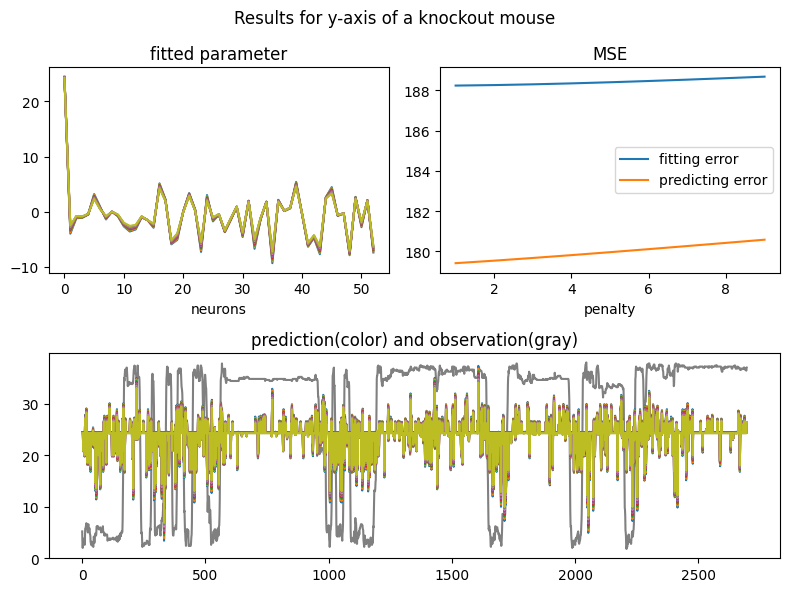

In [20]:
# coordinate
coord_axis="y-axis"
mouse_id=0
data_name=str(datalist[mouse_id]).split('/')[-1]
sample_type = "knockout" if "CaMKII" in data_name else "wild-type"

with open(Path(output_dir/f"rr_original_pRange1-9_coor{coord_axis}_{data_name}.pickle"),"rb") as f:
    results_list,y_test=pickle.load(f) # load theta(fitted weight), prediction, penealty, and observed position test data

plt.figure(figsize=(8,6))
plt.suptitle(f"Results for {coord_axis} of a {sample_type} mouse")
plt.subplot(212)
plt.plot(y_test/5,c="gray")
plt.title("prediction(color) and observation(gray)")

penalty_list,fit_erro_list,pred_erro_list=[],[],[]
for result in results_list:
    if result["fitting"]==False: # if the fitting falied
        continue
    penalty_list.append(result["penalty"])
    fit_erro_list.append(result["fitted error"]/25)
    pred_erro_list.append(cal_mse(result["prediction"],y_test)/25)


    plt.subplot(221)
    plt.plot(result["fitted parameter"]/5)
    plt.title("fitted parameter")
    plt.xlabel("neurons")

    plt.subplot(212)
    plt.plot(result["prediction"]/5)

plt.subplot(222)
plt.plot(penalty_list,fit_erro_list,label="fitting error")
plt.plot(penalty_list,pred_erro_list,label="predicting error")
plt.title("MSE")
plt.xlabel("penalty")
plt.legend()

plt.tight_layout()
    

## Fitting for y-coordinates

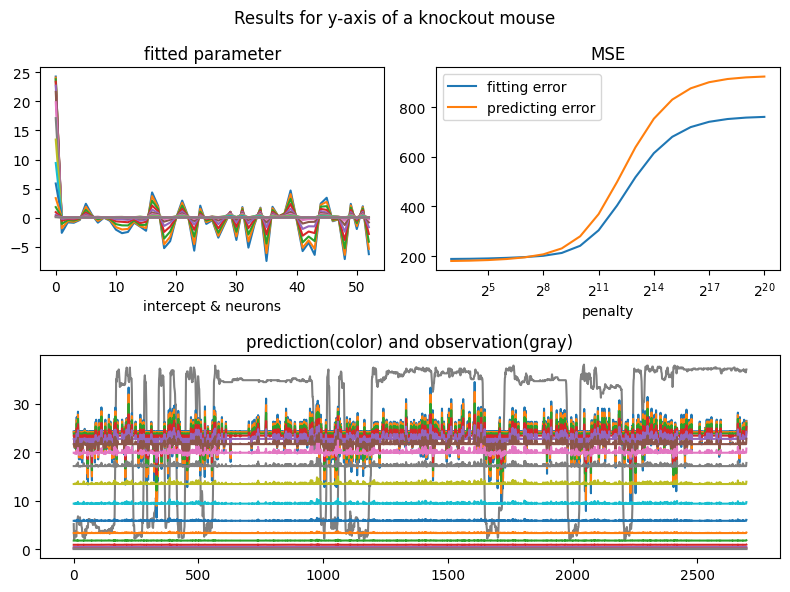

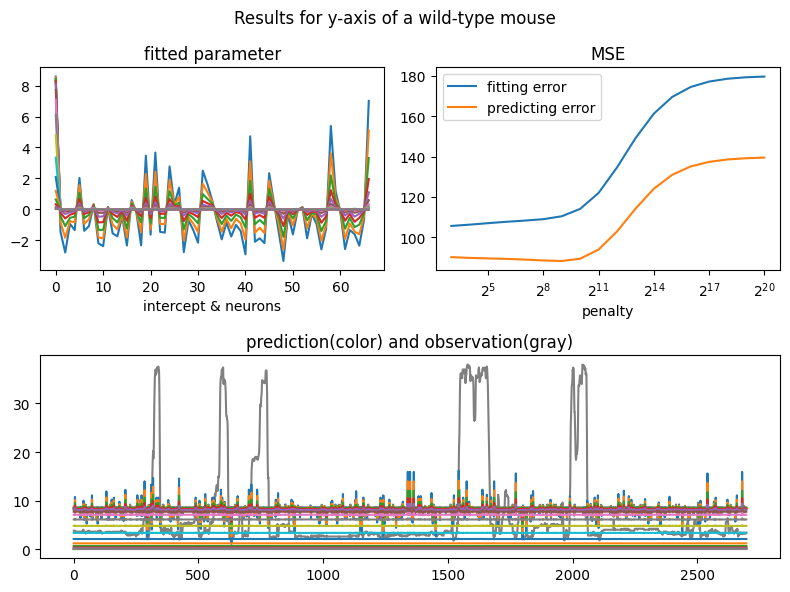

In [26]:
# coordinate
coord_axis="y-axis"
for mouse_id in [0,2]:
    data_name=str(datalist[mouse_id]).split('/')[-1]
    sample_type = "knockout" if "CaMKII" in data_name else "wild-type"

    with open(Path(output_dir/f"rr_summary_coor{coord_axis}_{data_name}.pickle"),"rb") as f:
        results_list,y_test=pickle.load(f) # load theta(fitted weight), prediction, penealty, and observed position test data
    
    plt.figure(figsize=(8,6))
    plt.suptitle(f"Results for {coord_axis} of a {sample_type} mouse")
    plt.subplot(212)
    plt.plot(y_test/5,c="gray")
    plt.title("prediction(color) and observation(gray)")

    penalty_list,fit_erro_list,pred_erro_list=[],[],[]
    for result in results_list:
        if result["fitting"]==False: # if the fitting falied
            continue
        penalty_list.append(result["penalty"])
        fit_erro_list.append(result["fitted error"]/25)
        pred_erro_list.append(cal_mse(result["prediction"],y_test)/25)

        plt.subplot(221)
        plt.plot(result["fitted parameter"]/5)
        plt.title("fitted parameter")
        plt.xlabel("intercept & neurons")

        plt.subplot(212)
        plt.plot(result["prediction"]/5)

    plt.subplot(222)
    plt.semilogx(penalty_list,fit_erro_list,base=2,label="fitting error")
    plt.semilogx(penalty_list,pred_erro_list,base=2,label="predicting error")
    plt.title("MSE")
    plt.xlabel("penalty")
    plt.legend()

    plt.tight_layout()
    

## Overall results

### x-axis

100%|██████████| 12/12 [00:00<00:00, 14.10it/s]


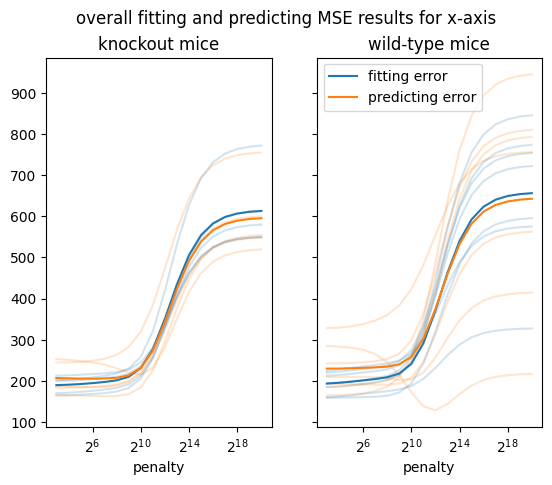

In [34]:
from matplotlib.lines import Line2D
fig,axes = plt.subplots(ncols=2,sharey=True)

coord_axis="x-axis"

fit_error_all_ko,fit_error_all_wt=[],[]
pred_error_all_ko,pred_error_all_wt=[],[]
penalty_list_all_ko,penalty_list_all_wt=[],[]
for data_dir in tqdm(datalist):
    data_name=str(data_dir).split('/')[-1]
    with open(output_dir/Path(f"rr_summary_coor{coord_axis}_{data_name}.pickle"),"rb") as f:
        results_list,y_test=pickle.load(f) 

    fit_error=[]
    pred_error=[]
    penalty_list=[]
    for result in results_list:
        fit_error.append((result["fitted error"])/25) # the model result didnt divide the coordnates data by 5
        pred_error.append(cal_mse(result["prediction"],y_test)/25)
        penalty_list.append(result["penalty"])


    if "CaMKII" in data_name:
        fit_error_all_ko.append(fit_error)
        pred_error_all_ko.append(pred_error)
        penalty_list_all_ko.append(penalty_list)
        axes[0].plot(penalty_list,fit_error,c="#1f77b4",alpha=.2)
        axes[0].plot(penalty_list,pred_error,c="#ff7f0e",alpha=.2)
        axes[0].set_title("knockout mice")
        axes[0].set_xlabel("penalty")
    else:
        fit_error_all_wt.append(fit_error)
        pred_error_all_wt.append(pred_error)
        penalty_list_all_wt.append(penalty_list)
        axes[1].plot(penalty_list,fit_error,c="#1f77b4",alpha=.2)
        axes[1].plot(penalty_list,pred_error,c="#ff7f0e",alpha=.2)
        axes[1].set_title("wild-type mice")
        axes[1].set_xlabel("penalty")

# average MSE 
axes[0].semilogx(penalty_list,np.average(fit_error_all_ko,axis=0),base=2,c="#1f77b4")
axes[0].semilogx(penalty_list,np.average(pred_error_all_ko,axis=0),base=2,c="#ff7f0e")
axes[1].semilogx(penalty_list,np.average(fit_error_all_wt,axis=0),base=2,c="#1f77b4")
axes[1].semilogx(penalty_list,np.average(pred_error_all_wt,axis=0),base=2,c="#ff7f0e")

plt.suptitle(f"overall fitting and predicting MSE results for {coord_axis}")
custom_lines = [Line2D([0], [0], c="#1f77b4"),
                Line2D([0], [0], c="#ff7f0e")]
plt.legend(custom_lines, ["fitting error","predicting error"])

## y-axis

100%|██████████| 12/12 [00:00<00:00, 14.12it/s]


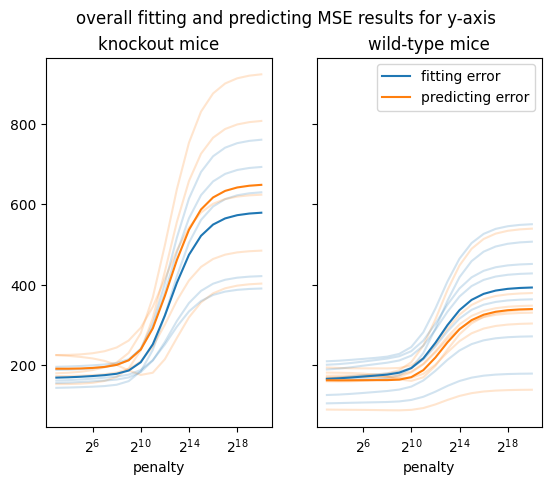

In [33]:
from matplotlib.lines import Line2D
fig,axes = plt.subplots(ncols=2,sharey=True)

coord_axis="y-axis"

fit_error_all_ko,fit_error_all_wt=[],[]
pred_error_all_ko,pred_error_all_wt=[],[]
penalty_list_all_ko,penalty_list_all_wt=[],[]
for data_dir in tqdm(datalist):
    data_name=str(data_dir).split('/')[-1]
    with open(output_dir/Path(f"rr_summary_coor{coord_axis}_{data_name}.pickle"),"rb") as f:
        results_list,y_test=pickle.load(f) 

    fit_error=[]
    pred_error=[]
    penalty_list=[]
    for result in results_list:
        fit_error.append((result["fitted error"])/25) # the model result didnt divide the coordnates data by 5
        pred_error.append(cal_mse(result["prediction"],y_test)/25)
        penalty_list.append(result["penalty"])


    if "CaMKII" in data_name:
        fit_error_all_ko.append(fit_error)
        pred_error_all_ko.append(pred_error)
        penalty_list_all_ko.append(penalty_list)
        axes[0].plot(penalty_list,fit_error,c="#1f77b4",alpha=.2)
        axes[0].plot(penalty_list,pred_error,c="#ff7f0e",alpha=.2)
        axes[0].set_title("knockout mice")
        axes[0].set_xlabel("penalty")
    else:
        fit_error_all_wt.append(fit_error)
        pred_error_all_wt.append(pred_error)
        penalty_list_all_wt.append(penalty_list)
        axes[1].plot(penalty_list,fit_error,c="#1f77b4",alpha=.2)
        axes[1].plot(penalty_list,pred_error,c="#ff7f0e",alpha=.2)
        axes[1].set_title("wild-type mice")
        axes[1].set_xlabel("penalty")

# average MSE 
axes[0].semilogx(penalty_list,np.average(fit_error_all_ko,axis=0),base=2,c="#1f77b4")
axes[0].semilogx(penalty_list,np.average(pred_error_all_ko,axis=0),base=2,c="#ff7f0e")
axes[1].semilogx(penalty_list,np.average(fit_error_all_wt,axis=0),base=2,c="#1f77b4")
axes[1].semilogx(penalty_list,np.average(pred_error_all_wt,axis=0),base=2,c="#ff7f0e")

plt.suptitle(f"overall fitting and predicting MSE results for {coord_axis}")
custom_lines = [Line2D([0], [0], c="#1f77b4"),
                Line2D([0], [0], c="#ff7f0e")]
plt.legend(custom_lines, ["fitting error","predicting error"])